In [1]:
import pandas as pd
import os
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

pd.set_option("mode.copy_on_write", True)
results = {}

In [2]:
# Replace this with the path to your downloads folder
downloads_folder = (
    "/Users/Sam/Documents/Duke/Spring 2024/IDS 705/Final Project/uds-2024-pangolin/data"
)

# Initialize an empty list to hold dataframes
dfs = []

# Iterate over each year and read the corresponding CSV file
for year in range(2017, 2024):
    file_path = os.path.join(
        downloads_folder, f"{year}_LoL_esports_match_data_from_OraclesElixir.csv"
    )
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all dataframes into one
df = pd.concat(dfs, ignore_index=True)

df

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,TREU/1001490056,complete,http://matchhistory.euw.leagueoflegends.com/en...,EU CS,2017,Spring,0,2017-01-10 15:44:06,1.0,6.24,...,118.0,798.0,612.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0
1,TREU/1001490056,complete,http://matchhistory.euw.leagueoflegends.com/en...,EU CS,2017,Spring,0,2017-01-10 15:44:06,1.0,6.24,...,100.0,533.0,96.0,-4.0,1.0,1.0,0.0,0.0,0.0,0.0
2,TREU/1001490056,complete,http://matchhistory.euw.leagueoflegends.com/en...,EU CS,2017,Spring,0,2017-01-10 15:44:06,1.0,6.24,...,131.0,1116.0,1227.0,18.0,1.0,1.0,0.0,0.0,0.0,2.0
3,TREU/1001490056,complete,http://matchhistory.euw.leagueoflegends.com/en...,EU CS,2017,Spring,0,2017-01-10 15:44:06,1.0,6.24,...,148.0,171.0,150.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,TREU/1001490056,complete,http://matchhistory.euw.leagueoflegends.com/en...,EU CS,2017,Spring,0,2017-01-10 15:44:06,1.0,6.24,...,1.0,246.0,83.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789679,10659-10659_game_4,partial,https://lpl.qq.com/es/stats.shtml?bmid=10659,DCup,2023,NaN,0,2023-12-31 11:48:06,4.0,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
789680,10659-10659_game_4,partial,https://lpl.qq.com/es/stats.shtml?bmid=10659,DCup,2023,NaN,0,2023-12-31 11:48:06,4.0,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
789681,10659-10659_game_4,partial,https://lpl.qq.com/es/stats.shtml?bmid=10659,DCup,2023,NaN,0,2023-12-31 11:48:06,4.0,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
789682,10659-10659_game_4,partial,https://lpl.qq.com/es/stats.shtml?bmid=10659,DCup,2023,NaN,0,2023-12-31 11:48:06,4.0,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
len(df["league"].unique())

94

In [20]:
# Calculate the career stats for each unique champion
champ_career_stats = (
    df.groupby("champion")
    .agg(
        {
            "result": "mean",  # avg win rate
            "kills": "mean",
            "deaths": "mean",
            "assists": "mean",
            "teamkills": "mean",
            "teamdeaths": "mean",
            "firstbloodkill": "mean",
            "firstbloodassist": "mean",
            "firstbloodvictim": "mean",
            "team kpm": "mean",
            "ckpm": "mean",
            "damagetochampions": "mean",
            "dpm": "mean",
            "damageshare": "mean",
            "damagetakenperminute": "mean",
            "damagemitigatedperminute": "mean",
            "wardsplaced": "mean",
            "wpm": "mean",
            "wardskilled": "mean",
            "wcpm": "mean",
            "controlwardsbought": "mean",
            "totalgold": "mean",
            "earnedgold": "mean",
            "earned gpm": "mean",
            "earnedgoldshare": "mean",
            "goldspent": "mean",
            "total cs": "mean",
            "minionkills": "mean",
            "monsterkillsownjungle": "mean",
            "monsterkillsenemyjungle": "mean",
            "cspm": "mean",
            "goldat10": "mean",
            "xpat10": "mean",
            "csat10": "mean",
            "goldat15": "mean",
            "xpat15": "mean",
            "csat15": "mean",
        }
    )
    .reset_index()
)

champ_career_stats.set_index("champion", inplace=True)

champ_career_stats

,result,kills,deaths,assists,teamkills,teamdeaths,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,...,minionkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,goldat15,xpat15,csat15
champion,,,,,,,,,,,,,,,,,,,,,
Aatrox,0.510479,2.905565,2.742713,4.566249,14.032763,13.537099,0.081189,0.080860,0.128582,0.448515,...,226.507423,12.961454,4.045100,7.854453,3241.475496,4551.964811,75.907614,5217.964414,7241.766385,122.883129
Ahri,0.513365,3.598867,2.224996,6.459904,14.835015,13.904054,0.097414,0.113426,0.097100,0.473894,...,255.769612,7.006258,1.864831,8.328439,3404.014393,4655.741139,84.438883,5455.148443,7464.931042,136.456498
Akali,0.510768,4.532468,2.736479,4.238369,15.219793,14.104882,0.097959,0.060401,0.082117,0.478592,...,238.198051,7.147165,1.796134,7.736900,3304.707558,4632.751187,79.534684,5274.970245,7337.970062,127.618474
Akshan,0.524000,4.036000,3.020000,4.464000,15.304000,15.272000,0.132000,0.133621,0.112069,0.490104,...,237.184000,9.869565,3.173913,7.988502,3373.758621,4509.073276,78.228448,5559.586207,7249.262931,126.793103
Alistar,0.506278,0.751137,3.302122,8.801689,13.684889,13.624486,0.044585,0.207149,0.122130,0.435639,...,41.973208,0.067597,0.042400,1.323209,2199.513530,2526.976787,13.863083,3381.885427,3840.413357,22.196003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zeri,0.509332,4.681355,2.209736,5.132192,13.955936,13.538965,0.109122,0.080468,0.083811,0.446162,...,282.763517,20.127094,3.661084,9.690634,3453.880850,3273.531280,84.291547,5666.055396,5569.820439,135.778176
Ziggs,0.480351,3.046232,2.456773,5.929727,14.125751,15.485437,0.058715,0.107383,0.083118,0.435770,...,268.358299,13.096073,2.079944,8.578373,3353.396489,3759.919463,81.213216,5519.371384,6192.016529,131.014463
Zilean,0.485364,1.344665,2.076487,8.263456,13.535411,13.479698,0.052034,0.107570,0.108566,0.419105,...,138.326723,6.234860,0.970458,4.344359,2678.438247,3636.810757,42.082669,4192.618526,5810.472112,68.914343


In [39]:
# Filter out only the rows with complete data
team_records = df[df["datacompleteness"] == "complete"]

# Filter out only the rows for team records (not individual player records)
team_records = df[df["participantid"] <= 10]


# Function to fill in the picks
def fill_picks(group):
    picks = group["champion"].tolist()  # Get list of champions for the team
    for i, pick in enumerate(picks, start=1):
        group[f"pick{i}"] = pick
    return group


# Group by gameid and teamname, then apply the function
team_records = team_records.groupby(["gameid", "teamname"]).apply(fill_picks)

In [41]:
team_records.reset_index(drop=True, inplace=True)
team_records.drop(
    columns=[
        "gameid",
        "datacompleteness",
        "url",
        "league",
        "split",
        "playoffs",
        "date",
        "participantid",
        "side",
        "playername",
        "playerid",
        "teamname",
        "teamid",
        "pick6",
        "pick7",
        "pick8",
        "pick9",
        "pick10",
    ],
    inplace=True,
)

KeyError: "['gameid', 'datacompleteness', 'url', 'league', 'split', 'playoffs', 'date', 'participantid', 'side', 'playername', 'playerid', 'teamname', 'teamid', 'pick6', 'pick7', 'pick8', 'pick9', 'pick10'] not found in axis"

In [55]:
team_records.drop(
    columns=[
        "firsttothreetowers",
        "mountains",
        "towers",
        "firsttower",
        "firstbaron",
        "firstdragon",
        "dragons",
        "opp_dragons",
        "elementaldrakes",
        "opp_elementaldrakes",
        "infernals",
        "clouds",
        "firstmidtower",
        "oceans",
        "chemtechs",
        "hextechs",
        "dragons (type unknown)",
        "elders",
        "opp_elders",
        "firstherald",
        "heralds",
        "opp_heralds",
        "opp_void_grubs",
        "opp_towers",
        "turretplates",
    ],
    inplace=True,
)

team_records

,year,game,patch,position,champion,ban1,ban2,ban3,ban4,ban5,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,2023,1.0,13.05,top,K'Sante,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,1.0,13.05,jng,Vi,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023,1.0,13.05,mid,Galio,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023,1.0,13.05,bot,Zeri,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023,1.0,13.05,sup,Alistar,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657870,2017,2.0,7.21,top,Shen,Camille,Kalista,Ornn,Orianna,Syndra,...,125.0,134.0,139.0,-13.0,2.0,0.0,0.0,0.0,0.0,1.0
657871,2017,2.0,7.21,jng,Gragas,Camille,Kalista,Ornn,Orianna,Syndra,...,49.0,135.0,347.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0
657872,2017,2.0,7.21,mid,Azir,Camille,Kalista,Ornn,Orianna,Syndra,...,139.0,-68.0,33.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0
657873,2017,2.0,7.21,bot,Varus,Camille,Kalista,Ornn,Orianna,Syndra,...,126.0,345.0,312.0,13.0,0.0,2.0,0.0,0.0,0.0,1.0


In [60]:
team_records.drop(
    columns=[
        "void_grubs",
        "gspd",
        "opp_turretplates",
        "opp_barons",
        "barons",
        "monsterkillsenemyjungle",
        "monsterkillsenemyjungle",
        "opp_inhibitors",
        "inhibitors",
    ],
    inplace=True,
)

team_records

,year,game,patch,position,champion,ban1,ban2,ban3,ban4,ban5,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,2023,1.0,13.05,top,K'Sante,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,1.0,13.05,jng,Vi,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023,1.0,13.05,mid,Galio,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023,1.0,13.05,bot,Zeri,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023,1.0,13.05,sup,Alistar,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657870,2017,2.0,7.21,top,Shen,Camille,Kalista,Ornn,Orianna,Syndra,...,125.0,134.0,139.0,-13.0,2.0,0.0,0.0,0.0,0.0,1.0
657871,2017,2.0,7.21,jng,Gragas,Camille,Kalista,Ornn,Orianna,Syndra,...,49.0,135.0,347.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0
657872,2017,2.0,7.21,mid,Azir,Camille,Kalista,Ornn,Orianna,Syndra,...,139.0,-68.0,33.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0
657873,2017,2.0,7.21,bot,Varus,Camille,Kalista,Ornn,Orianna,Syndra,...,126.0,345.0,312.0,13.0,0.0,2.0,0.0,0.0,0.0,1.0


In [62]:
team_records_final = team_records.dropna()
team_records_final

,year,game,patch,position,champion,ban1,ban2,ban3,ban4,ban5,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
33000,2018,1.0,8.11,top,Aatrox,Graves,Taliyah,Irelia,Soraka,Nunu & Willump,...,129.0,250.0,1297.0,25.0,0.0,0.0,0.0,1.0,1.0,0.0
33001,2018,1.0,8.11,jng,Camille,Graves,Taliyah,Irelia,Soraka,Nunu & Willump,...,139.0,-88.0,-585.0,-43.0,1.0,2.0,2.0,0.0,2.0,2.0
33002,2018,1.0,8.11,mid,Lulu,Graves,Taliyah,Irelia,Soraka,Nunu & Willump,...,52.0,2757.0,2413.0,90.0,2.0,1.0,0.0,0.0,2.0,1.0
33003,2018,1.0,8.11,bot,Kai'Sa,Graves,Taliyah,Irelia,Soraka,Nunu & Willump,...,131.0,344.0,212.0,24.0,0.0,0.0,0.0,0.0,1.0,0.0
33004,2018,1.0,8.11,sup,Alistar,Graves,Taliyah,Irelia,Soraka,Nunu & Willump,...,22.0,-408.0,-110.0,3.0,0.0,1.0,1.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657870,2017,2.0,7.21,top,Shen,Camille,Kalista,Ornn,Orianna,Syndra,...,125.0,134.0,139.0,-13.0,2.0,0.0,0.0,0.0,0.0,1.0
657871,2017,2.0,7.21,jng,Gragas,Camille,Kalista,Ornn,Orianna,Syndra,...,49.0,135.0,347.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0
657872,2017,2.0,7.21,mid,Azir,Camille,Kalista,Ornn,Orianna,Syndra,...,139.0,-68.0,33.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0
657873,2017,2.0,7.21,bot,Varus,Camille,Kalista,Ornn,Orianna,Syndra,...,126.0,345.0,312.0,13.0,0.0,2.0,0.0,0.0,0.0,1.0


In [31]:
# Filter out only the rows with complete data
team_records = df[df["datacompleteness"] == "complete"]

# Filter out only the rows for team records (not individual player records)
team_records = df[df["participantid"] <= 10]

# Drop unnecessary columns
team_records = team_records[
    [
        "gameid",
        "participantid",
        "champion",
        "pick1",
        "pick2",
        "pick3",
        "pick4",
        "pick5",
        "year",
        "patch",
        "playername",
        "teamname",
        "result",
    ]
]


# Function to fill in the picks
def fill_picks(group):
    picks = group["champion"].tolist()  # Get list of champions for the team
    for i, pick in enumerate(picks, start=1):
        group[f"pick{i}"] = pick
    return group


# Group by gameid and teamname, then apply the function
team_records = team_records.groupby(["gameid", "teamname"]).apply(fill_picks)

print(team_records)

KeyboardInterrupt: 

In [12]:
team_records_final = team_records.drop(
    columns=["playername", "pick6", "pick7", "pick8", "pick9", "pick10"]
)

# save as csv
team_records_final.to_csv("team_records_final.csv", index=False)

KeyError: "['pick6', 'pick7', 'pick8', 'pick9', 'pick10'] not found in axis"

In [8]:
# Read the csv file
team_records_final = pd.read_csv("team_records_final.csv")

In [9]:
team_records_final = team_records_final.join(
    champ_career_stats, on="champion", how="left", rsuffix="_champ"
)
team_records_final = team_records_final.drop(
    columns=["gameid", "teamname", "participantid"]
)

In [13]:
team_records_final.reset_index(drop=True, inplace=True)
team_records_final.drop("playername", axis=1, inplace=True)
team_records_final.dropna(inplace=True)

In [64]:
team_records_final

,year,game,patch,position,champion,ban1,ban2,ban3,ban4,ban5,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
33000,2018,1.0,8.11,top,Aatrox,Graves,Taliyah,Irelia,Soraka,Nunu & Willump,...,129.0,250.0,1297.0,25.0,0.0,0.0,0.0,1.0,1.0,0.0
33001,2018,1.0,8.11,jng,Camille,Graves,Taliyah,Irelia,Soraka,Nunu & Willump,...,139.0,-88.0,-585.0,-43.0,1.0,2.0,2.0,0.0,2.0,2.0
33002,2018,1.0,8.11,mid,Lulu,Graves,Taliyah,Irelia,Soraka,Nunu & Willump,...,52.0,2757.0,2413.0,90.0,2.0,1.0,0.0,0.0,2.0,1.0
33003,2018,1.0,8.11,bot,Kai'Sa,Graves,Taliyah,Irelia,Soraka,Nunu & Willump,...,131.0,344.0,212.0,24.0,0.0,0.0,0.0,0.0,1.0,0.0
33004,2018,1.0,8.11,sup,Alistar,Graves,Taliyah,Irelia,Soraka,Nunu & Willump,...,22.0,-408.0,-110.0,3.0,0.0,1.0,1.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657870,2017,2.0,7.21,top,Shen,Camille,Kalista,Ornn,Orianna,Syndra,...,125.0,134.0,139.0,-13.0,2.0,0.0,0.0,0.0,0.0,1.0
657871,2017,2.0,7.21,jng,Gragas,Camille,Kalista,Ornn,Orianna,Syndra,...,49.0,135.0,347.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0
657872,2017,2.0,7.21,mid,Azir,Camille,Kalista,Ornn,Orianna,Syndra,...,139.0,-68.0,33.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0
657873,2017,2.0,7.21,bot,Varus,Camille,Kalista,Ornn,Orianna,Syndra,...,126.0,345.0,312.0,13.0,0.0,2.0,0.0,0.0,0.0,1.0


In [65]:
team_records_final_ohe = pd.get_dummies(
    team_records_final,
    columns=[
        "champion",
        "pick1",
        "pick2",
        "pick3",
        "pick4",
        "pick5",
        "ban1",
        "ban2",
        "ban3",
        "ban4",
        "ban5",
        "patch",
        "year",
        "position",
    ],
    drop_first=True,
)
team_records_final_ohe

,game,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,...,patch_12.05,year_2018,year_2019,year_2020,year_2021,year_2022,position_jng,position_mid,position_sup,position_top
33000,1.0,1403,1,2,0,2,17,4,1.0,0.0,...,False,True,False,False,False,False,False,False,False,True
33001,1.0,1403,1,1,3,11,17,4,0.0,0.0,...,False,True,False,False,False,False,True,False,False,False
33002,1.0,1403,1,4,0,9,17,4,1.0,0.0,...,False,True,False,False,False,False,False,True,False,False
33003,1.0,1403,1,9,0,4,17,4,2.0,0.0,...,False,True,False,False,False,False,False,False,False,False
33004,1.0,1403,1,1,1,11,17,4,0.0,0.0,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657870,2.0,3024,1,4,3,19,25,20,1.0,0.0,...,False,False,False,False,False,False,False,False,False,True
657871,2.0,3024,1,2,5,15,25,20,0.0,0.0,...,False,False,False,False,False,False,True,False,False,False
657872,2.0,3024,1,12,3,8,25,20,3.0,2.0,...,False,False,False,False,False,False,False,True,False,False
657873,2.0,3024,1,6,4,14,25,20,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [66]:
X = team_records_final_ohe.drop("result", axis=1)
y = team_records_final_ohe["result"]

In [10]:
# Apply PCA to reduce the number of features
from sklearn.decomposition import PCA

pca = PCA(n_components=0.8)
X = team_records_final_ohe.drop(columns=["result"])
y = team_records_final_ohe["result"]
X_pca = pca.fit_transform(X)

In [67]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a logistic regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8776809352410982

In [71]:
# Display coefficients and p-values
import numpy as np
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [31]:
# # Filter out only the rows with complete data
# team_records = df[df["datacompleteness"] == "complete"]

# # Filter out only the rows for team records (not individual player records)
# team_records = df[df["participantid"] > 10]

# # Drop unnecessary columns
# team_records = team_records[
#     [
#         "gameid",
#         "participantid",
#         "pick1",
#         "pick2",
#         "pick3",
#         "pick4",
#         "pick5",
#         "result",
#         "year",
#         "patch",
#         "playername",
#         "teamname"
#     ]
# ]

# team_records = team_records.dropna()
# team_records

,gameid,participantid,pick1,pick2,pick3,pick4,pick5,result
406,ESPORTSTMNT06/20195,100,Varus,Olaf,Miss Fortune,Nautilus,Aurelion Sol,1
407,ESPORTSTMNT06/20195,200,Zyra,Kha'Zix,Syndra,Ezreal,Maokai,0
418,ESPORTSTMNT06/20207,100,Varus,Elise,Zyra,Ahri,Poppy,1
419,ESPORTSTMNT06/20207,200,Ashe,Olaf,Miss Fortune,Taliyah,Nautilus,0
430,ESPORTSTMNT06/20215,100,Ryze,Olaf,Malzahar,Caitlyn,Nautilus,0
...,...,...,...,...,...,...,...,...
789659,10659-10659_game_2,200,Neeko,Vi,Aatrox,Kai'Sa,Alistar,0
789670,10659-10659_game_3,100,Rumble,Lee Sin,LeBlanc,Renata Glasc,Xayah,1
789671,10659-10659_game_3,200,Akali,Sejuani,Tristana,Kai'Sa,Karma,0
789682,10659-10659_game_4,100,Rumble,Poppy,Azir,Senna,Tahm Kench,0


In [11]:
# # Add opponent's picks as new columns
# for i, row in team_records.iterrows():
#     # Find the opponent's row for the same game
#     opponent_row = team_records[
#         (team_records["gameid"] == row["gameid"])
#         & (team_records["participantid"] != row["participantid"])
#     ]
#     if not opponent_row.empty:  # Check if the opponent row exists
#         for pick in ["pick1", "pick2", "pick3", "pick4", "pick5"]:
#             team_records.loc[i, f"opp_{pick}"] = opponent_row[pick].values[0]
#     else:
#         # Handle the case where no opponent row is found
#         for pick in ["pick1", "pick2", "pick3", "pick4", "pick5"]:
#             team_records.loc[i, f"opp_{pick}"] = None  # or use 'Unknown', etc.

In [12]:
# Define the columns for picks and opponent picks
pick_columns = ["pick1", "pick2", "pick3", "pick4", "pick5"]
opp_pick_columns = ["opp_pick1", "opp_pick2", "opp_pick3", "opp_pick4", "opp_pick5"]

# Iterate over each pick column
for pick_col, opp_pick_col in zip(pick_columns, opp_pick_columns):
    # Join the career stats for the team's picks
    team_records = team_records.join(
        champ_career_stats, on=pick_col, rsuffix=f"_stats_{pick_col}"
    )

    # Join the career stats for the opponent's picks
    team_records = team_records.join(
        champ_career_stats, on=opp_pick_col, rsuffix=f"_stats_{opp_pick_col}"
    )

In [13]:
final_df = team_records

In [14]:
# Concatenate all pick columns and opp_pick columns into two separate series
team_picks = pd.concat([team_records[f"pick{i}"] for i in range(1, 6)])
opp_picks = pd.concat([team_records[f"opp_pick{i}"] for i in range(1, 6)])

# One-hot encode the concatenated series
team_picks_encoded = pd.get_dummies(team_picks, prefix="TeamPick", drop_first=True)
opp_picks_encoded = pd.get_dummies(opp_picks, prefix="OppPick", drop_first=True)

# Group by the index (gameid) and sum the one-hot encoded columns
team_picks_encoded = team_picks_encoded.groupby(team_picks_encoded.index).sum()
opp_picks_encoded = opp_picks_encoded.groupby(opp_picks_encoded.index).sum()

# Join the one-hot encoded columns with the team_records dataframe
final_df = team_records.join(team_picks_encoded).join(opp_picks_encoded)

In [15]:
# Rename `kills`, `deaths`, and `assists` columns to end_with `_stats_pick1`
final_df.rename(
    columns={
        "kills": "kills_stats_pick1",
        "deaths": "deaths_stats_pick1",
        "assists": "assists_stats_pick1",
    },
    inplace=True,
)

In [16]:
# Drop NA values
final_df.dropna(inplace=True)

# Save the final dataframe to a CSV file
#final_df.to_csv("final_df.csv", index=False)

In [17]:
# Drop the result column
y = final_df["result"]

final_df = final_df.drop(
    [
        "gameid",
        "participantid",
        "result",
        "pick1",
        "pick2",
        "pick3",
        "pick4",
        "pick5",
        "opp_pick1",
        "opp_pick2",
        "opp_pick3",
        "opp_pick4",
        "opp_pick5",
    ],
    axis=1,
)

In [18]:
# Perform PCA on the final dataframe
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(final_df)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [19]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Add a constant term for the intercept
X_with_const = sm.add_constant(final_df)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

In [20]:
# Fit the model
logit_model = sm.Logit(y_train, X_train).fit()

# Print the summary of the model
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.684972
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 result   No. Observations:                85731
Model:                          Logit   Df Residuals:                    85379
Method:                           MLE   Df Model:                          351
Date:                Wed, 03 Apr 2024   Pseudo R-squ.:                 0.01179
Time:                        16:30:25   Log-Likelihood:                -58723.
converged:                       True   LL-Null:                       -59424.
Covariance Type:            nonrobust   LLR p-value:                2.325e-125
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0012      0.001     -1.020      0.308      -0.004       0.001
x2            -0.0002      0.

In [21]:
# Evaluate the model
y_pred = logit_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.537022348714599
Precision: 0.5349821327816437
Recall: 0.5333270835286398
F1 Score: 0.5341533261349232


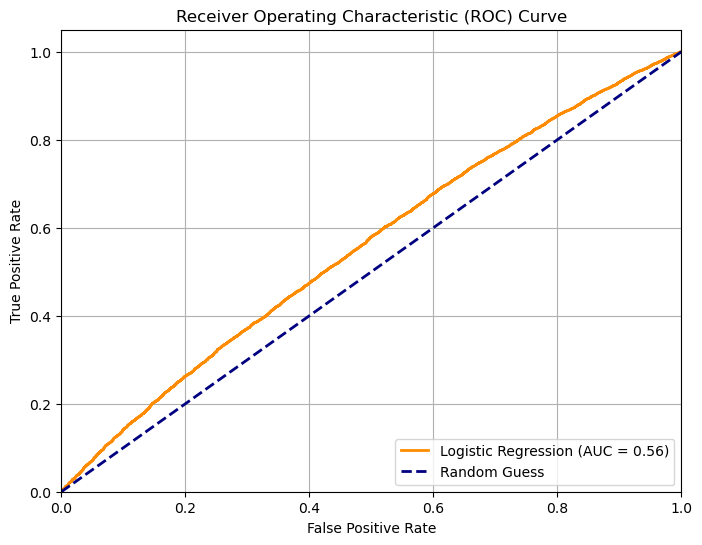

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
# Plot the ROC curve
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=2,
    label=f"Logistic Regression (AUC = {roc_auc:.2f})",
)

# Plot the line for random guessing
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random Guess")

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
# # Process each game's champion picks individually
# unique_games = df["gameid"].unique()
# for game_id in unique_games:
#     game_data = df[df["gameid"] == game_id]
#     player_records = game_data.iloc[:10]
#     team_records = game_data.iloc[10:12]

#     # Extract team compositions
#     team_1_composition = team_records.iloc[0][
#         ["pick1", "pick2", "pick3", "pick4", "pick5"]
#     ].values
#     team_2_composition = team_records.iloc[1][
#         ["pick1", "pick2", "pick3", "pick4", "pick5"]
#     ].values

#     # Append team compositions to individual player records
#     df.loc[player_records.index[:5], ["pick1", "pick2", "pick3", "pick4", "pick5"]] = (
#         team_1_composition
#     )
#     df.loc[player_records.index[5:], ["pick1", "pick2", "pick3", "pick4", "pick5"]] = (
#         team_2_composition
#     )